In [17]:
from keras.datasets import mnist
from keras import models
from keras import utils
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


On récupère la data et on la filtre dans un premier temps afin de pouvoir travailler avec

MNIST Implémentation du DNN

Dans un premier temps, nous allons essayer d'implémenter un modèle à simple couche comme présenté dans le livre, ici nous ne cherchons pas à optimiser, juste effectuer une simple implémentation, nous essayons d'abord avec plusieurs epoch pour savoir 

In [18]:
(train_input, train_target), (test_input, test_target) = mnist.load_data()

#Partie normalisation
train_input = train_input.astype('float32') / 255
test_input = test_input.astype('float32') / 255
train_target = utils.to_categorical(train_target)
test_target = utils.to_categorical(test_target)

result = []
loss = []
val_loss = []

for epoch in range(1, 20):
    print("working on epoch = ",epoch)
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(10, activation='sigmoid'))

    model.compile(loss='mse',
                metrics=['accuracy'])

    history = model.fit(train_input, train_target, epochs=epoch, batch_size=128, validation_data=(test_input, test_target), verbose=0)

    test_loss, test_acc = model.evaluate(test_input, test_target)
    loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])
    result.append((test_loss, test_acc))



working on epoch =  1
313/313 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.8838
working on epoch =  2
313/313 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 0.8977
working on epoch =  3
313/313 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9043
working on epoch =  4
313/313 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9091
working on epoch =  5
313/313 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9115
working on epoch =  6
313/313 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.9122
working on epoch =  7
313/313 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9131
working on epoch =  8
313/313 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9144
working on epoch =  9
313/313 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9154
w

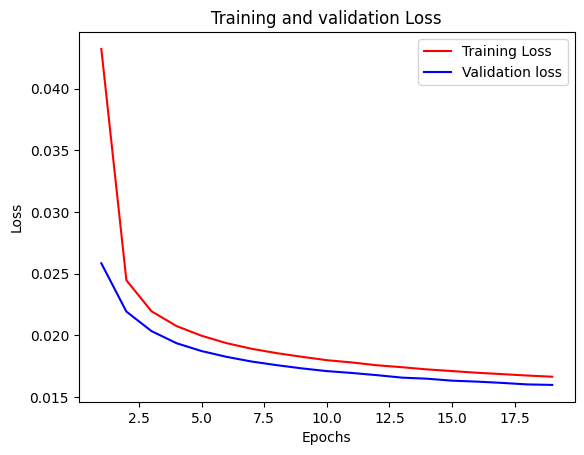

In [19]:
#On affiche ensuite les résultats

epochs = range(1,20)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Voici l'implémentation retenue

In [20]:
(train_input, train_target), (test_input, test_target) = mnist.load_data()

#Partie normalisation
train_input = train_input.astype('float32') / 255
test_input = test_input.astype('float32') / 255
train_target = utils.to_categorical(train_target)
test_target = utils.to_categorical(test_target)

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(loss='mse',
            metrics=['accuracy'])

history = model.fit(train_input, train_target, epochs=epoch, batch_size=128, validation_data=(test_input, test_target), verbose=0)

test_loss, test_acc = model.evaluate(test_input, test_target)

predictions = model.predict(test_input)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_target, axis=1)

# Calcul de la matrice de confusion
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print("Pertes du modèle : ", test_loss, " Précision du modèle: ", test_acc)
print("Matrice de confusion :")
print(confusion_mat)


313/313 [==============================] - 0s 1ms/step
Pertes du modèle :  0.01595308445394039  Précision du modèle:  0.9186000227928162
Matrice de confusion :
[[ 964    0    0    2    0    1    8    1    4    0]
 [   0 1105    3    3    0    1    4    2   17    0]
 [   9    1  928   11   10    2   11   15   40    5]
 [   3    0   22  922    2   18    4    9   20   10]
 [   2    1    6    0  904    0   12    2   11   44]
 [  13    2    3   35   12  754   20    8   36    9]
 [  10    3    4    1    8   13  910    1    8    0]
 [   3   10   25    4    7    1    1  944    2   31]
 [  12    6    7   17   12   18   12   13  871    6]
 [  10    6    2   15   43    9    0   22   18  884]]


Optimisation du DNN

In [23]:
(train_input, train_target), (test_input, test_target) = mnist.load_data()

#Partie normalisation
train_input = train_input.astype('float32') / 255
test_input = test_input.astype('float32') / 255

train_target = utils.to_categorical(train_target)
test_target = utils.to_categorical(test_target)

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(train_input, train_target, epochs=5, batch_size=128, validation_data=(test_input, test_target))

test_loss, test_acc = model.evaluate(test_input, test_target)
print('Test accuracy:', test_acc, ' Test loss:', test_loss) 

Epoch 1/5
469/469 [==============================] - 8s 4ms/step - loss: 0.0203 - accuracy: 0.8697 - val_loss: 0.0103 - val_accuracy: 0.9350
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0096 - accuracy: 0.9389 - val_loss: 0.0079 - val_accuracy: 0.9476
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0072 - accuracy: 0.9546 - val_loss: 0.0064 - val_accuracy: 0.9591
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0058 - accuracy: 0.9634 - val_loss: 0.0056 - val_accuracy: 0.9629
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0054 - accuracy: 0.9651
Test accuracy: 0.9650999903678894  Test loss: 0.005380342714488506


Réseau multicouche par convolution 

In [22]:
(train_input, train_target), (test_input, test_target) = mnist.load_data()

# Normaliser les images et convertir les étiquettes en vecteurs binaires
train_input = train_input.astype('float32') / 255
test_input = test_input.astype('float32') / 255
train_labels = utils.to_categorical(train_target)
test_labels = utils.to_categorical(test_target)

# Réorganiser les dimensions des images pour convenir à l'entrée du CNN
train_input = np.expand_dims(train_input, axis=-1)
test_input = np.expand_dims(test_input, axis=-1)
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(train_input, train_labels, batch_size=128, epochs=5, validation_data=(test_input, test_labels))

# Évaluer le modèle sur les données de test
test_loss, test_acc = model.evaluate(test_input, test_labels)
print('Test accuracy:', test_acc, ' Test loss:', test_loss)

Epoch 1/5
469/469 [==============================] - 25s 52ms/step - loss: 0.2106 - accuracy: 0.9377 - val_loss: 0.0721 - val_accuracy: 0.9761
Epoch 2/5
469/469 [==============================] - 24s 52ms/step - loss: 0.0593 - accuracy: 0.9819 - val_loss: 0.0440 - val_accuracy: 0.9871
Epoch 3/5
469/469 [==============================] - 25s 53ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0369 - val_accuracy: 0.9866
Epoch 4/5
469/469 [==============================] - 26s 56ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.0294 - val_accuracy: 0.9905
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0315 - accuracy: 0.9892
Test accuracy: 0.9891999959945679  Test loss: 0.03153769299387932
